<a href="https://colab.research.google.com/github/ATPONNUTTAYOTHIN781/Statistical-Learning-Labs/blob/main/Lab06_SVM_660510781.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

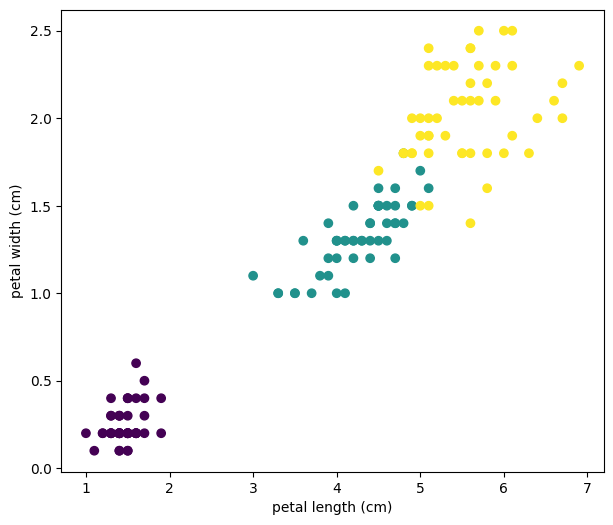

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
#TODO
# แบ่งข้อมูล: 70% สำหรับฝึก, 30% สำหรับทดสอบ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

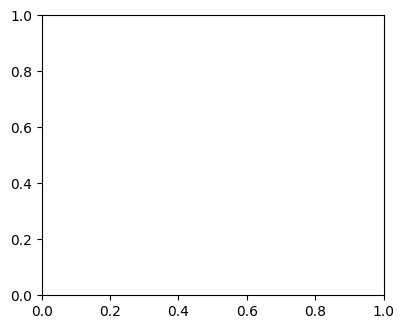

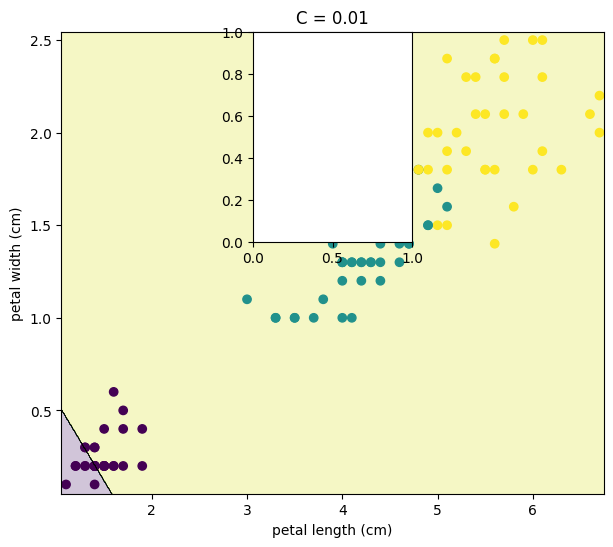

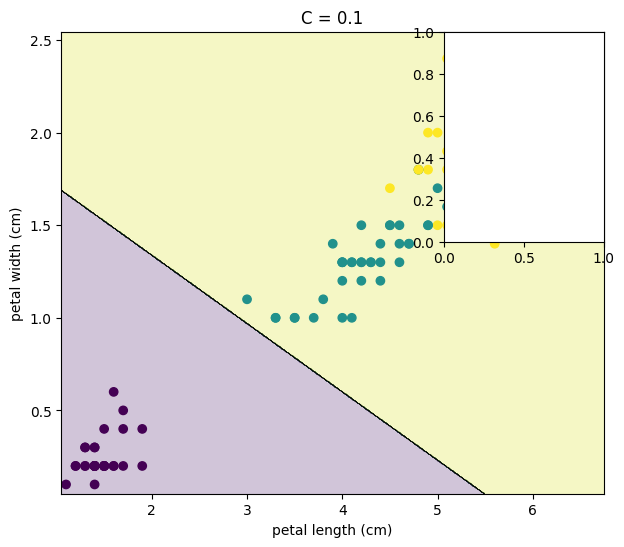

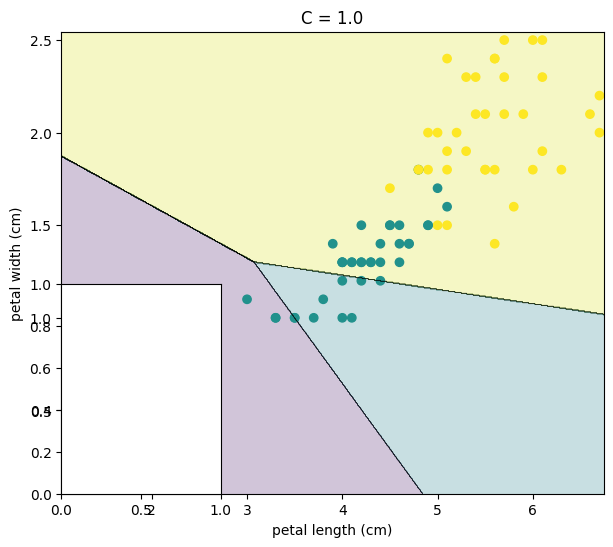

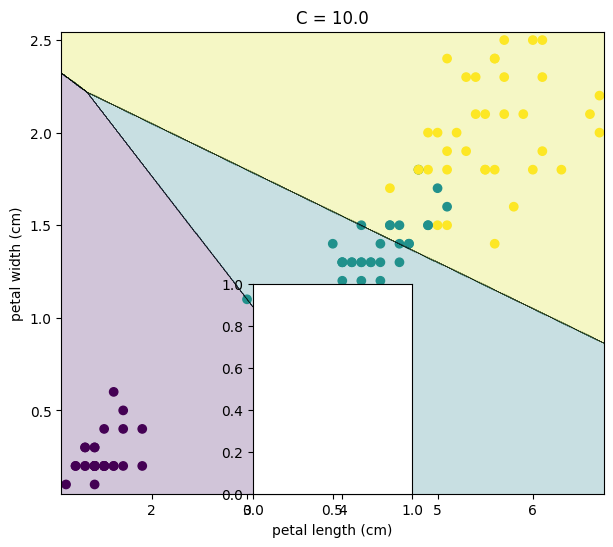

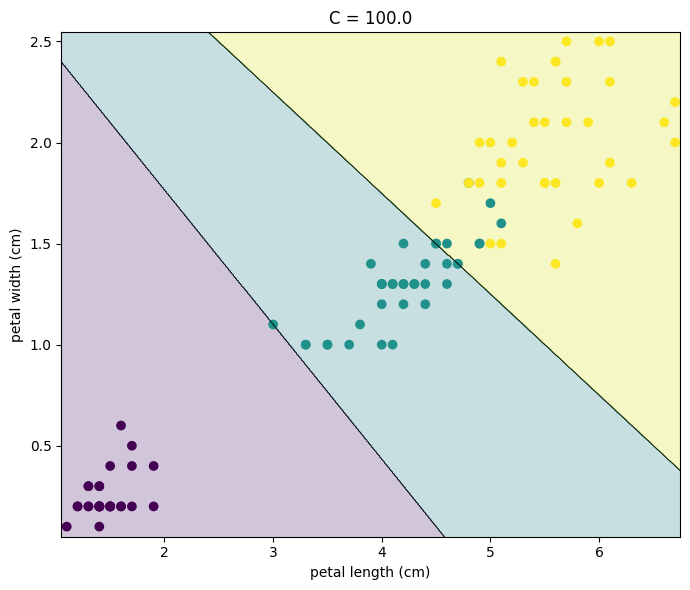

In [6]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

plt.figure(figsize=(15, 8))

for i, C in enumerate(C_values):
    clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)

    plt.subplot(2, 3, i+1)
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f"C = {C}")

plt.tight_layout()
plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [8]:
#TODO
from sklearn.metrics import accuracy_score
C_best = 1.0

# ฝึกโมเดล
clf = LinearSVC(loss='hinge', C=C_best, max_iter=100000, random_state=42)
clf.fit(X_train, y_train)

# ทำนายบนชุดทดสอบ
y_pred = clf.predict(X_test)

# คำนวณ Test Error
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

print(f"C = {C_best}")
print(f"Accuracy (Test Set) = {accuracy:.3f}")
print(f"Test Error = {test_error:.3f}")

C = 1.0
Accuracy (Test Set) = 0.756
Test Error = 0.244


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

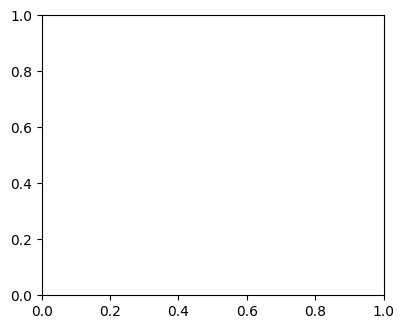

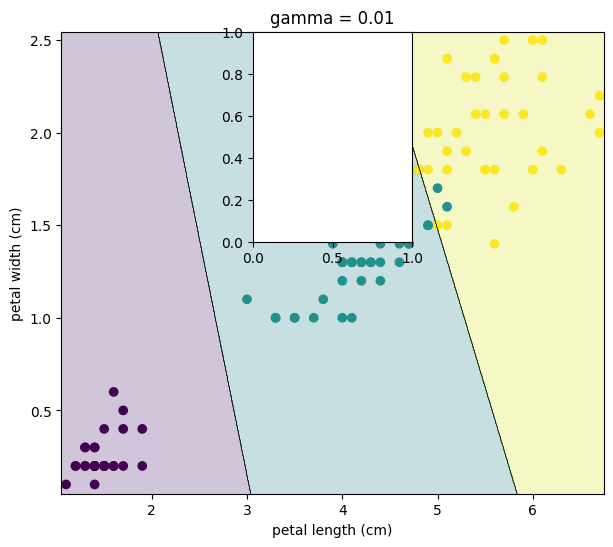

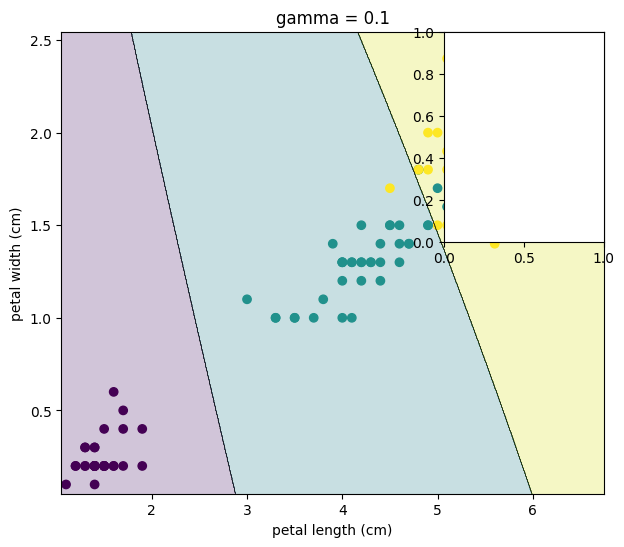

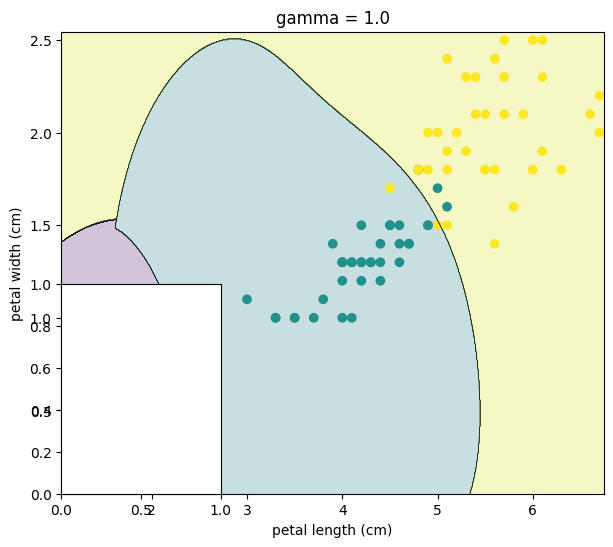

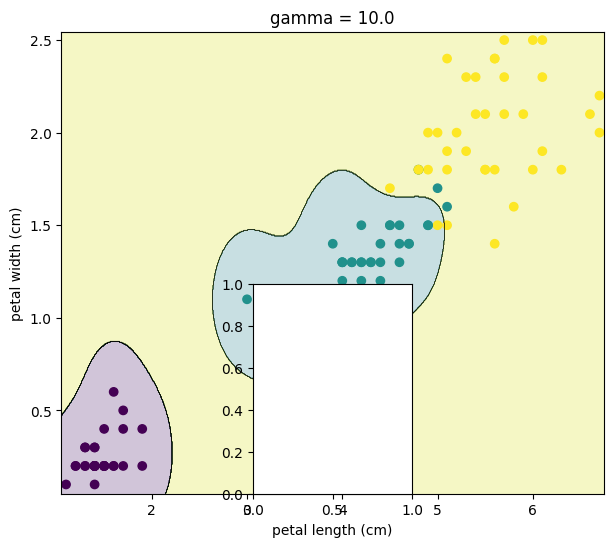

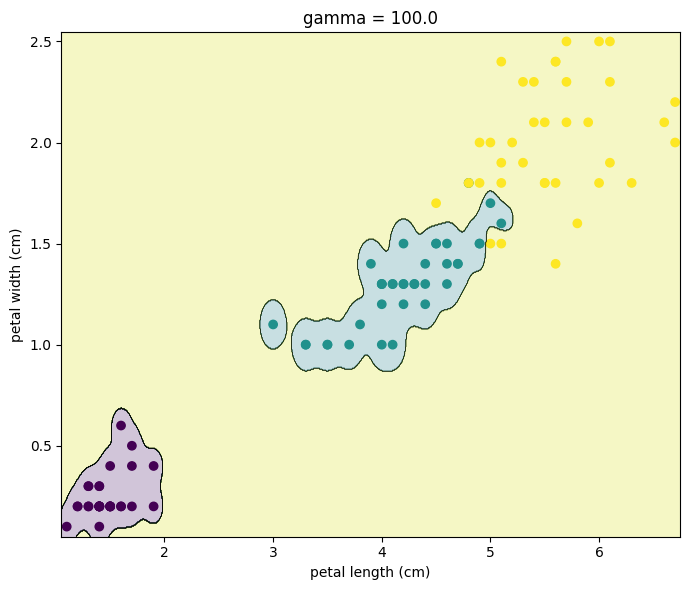

In [9]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

plt.figure(figsize=(15, 8))

for i, gamma in enumerate(gamma_values):
    clf = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)

    plt.subplot(2, 3, i+1)
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f"gamma = {gamma}")

plt.tight_layout()
plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [10]:
#TODO
# เลือกค่า gamma ที่ต้องการ
gamma_best = 1.0

# สร้างและฝึกโมเดล SVM (RBF kernel)
clf = SVC(kernel='rbf', C=1.0, gamma=gamma_best, max_iter=100000, random_state=42)
clf.fit(X_train, y_train)

# ทำนายบนชุดทดสอบ
y_pred = clf.predict(X_test)

# คำนวณ Test Error
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

# จำนวน support vectors
num_support_vectors = clf.support_.shape[0]

print(f"Gamma = {gamma_best}")
print(f"Accuracy (Test Set) = {accuracy:.3f}")
print(f"Test Error = {test_error:.3f}")
print(f"Number of support vectors = {num_support_vectors}")

Gamma = 1.0
Accuracy (Test Set) = 1.000
Test Error = 0.000
Number of support vectors = 28


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [ ]:
#TODO

1.อธิบายด้วย Test Accuracy

=> เราสามารถเปรียบเทียบค่า accuracy บนชุดทดสอบ จาก Exercise 3 (Linear SVM) และ Exercise 5 (Kernel SVM) ได้

=> ถ้า Kernel SVM ให้ accuracy สูงกว่า → แปลว่ามันสามารถจับความซับซ้อนของข้อมูล Iris ได้ดีกว่า

=> แต่ถ้าค่าใกล้เคียงกัน → อาจเลือก Linear SVM เพราะโมเดลง่ายกว่า รันเร็วกว่า และเข้าใจง่ายกว่า

2.อธิบายด้วย Decision Boundary Plot

=> Linear SVM → เส้นขอบเขตการตัดสินใจเป็น เส้นตรง (linear) ใน space ของ features → ถ้าข้อมูลไม่แยกเชิงเส้นสมบูรณ์ มันจะไม่สามารถแบ่งได้ดี

=> Kernel SVM (RBF) → เส้นขอบเขต โค้งและซับซ้อน สามารถโอบล้อมกลุ่มข้อมูลได้ → เหมาะกับข้อมูลที่มี pattern โค้งหรือซับซ้อน เช่น Iris ที่บาง class ซ้อนกัน